# Predicting NASDAQ Stock Index Price
The objective of the project is for exploration and testing of different methods of machine learning, more specifically, methods learned in class and various other methods practiced throughout the market. There are many implications that you can acquire from the robust data available to investors we wanted to determine if we could exploit some of these ideas so that we might have a better understanding of how the market performs and if it was possible to predict prices. It is well known that it is challenging to predict stock market prices due to the presence of volatility, nevertheless, we wanted to encounter and explore this challenge for ourselves. We used multiple different methods to determine the best features to use for the model then we deployed some models using neural networks to help us understand the behaviors of the ever changing market place.

Accurate prediction of the stock market would be tremendous for the financial industry, or anybody for that matter. In reality, we know that this is a very difficult task and no one has quite been able to perfect the algorithm, that being said, we only hope to be inspired by the project to develop a better model in the future based on the same ideas that we deployed for this project. The number one rule when talking about the market is 'never lose money'. Risk comes from those that are not prepared or those that don't understand the data. Technology is far from being able to predict the future, but if we can understand the data and determine a way to leverage its insights we can make better investments with higher returns.

“Forecasts may tell you a great deal about the forecaster; they tell you nothing about the future.” -Warren Buffet


# Data
NASDAQ index data is available online through various financial data aggregators, 
we used Alpha Vantage API to procure our data. We collected the obvious ones: 'Open', 'Close' etc. but we also 
wanted to see if factors like method of moments or weighted moving average would help us in better predicting the 'close' price. 
The time-series dataset contains 2518 instances (days),approximately 10 years worth of data. Each instance in the
data set contains 24 features for which we will leverage in making predictions.


## Import Statements and Data Import

In [343]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpha_vantage
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Lasso
from pandas import Series
import time
import csv 
import json
import sys
from sklearn.model_selection import TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from sklearn.preprocessing import StandardScaler
from yellowbrick.features.pca import PCADecomposition
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score,mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from ta import *
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from IPython.display import display
import io
plt.rcParams['figure.figsize'] = (18, 13)
# from __future__ import absolute_import
# from __future__ import division
# from __future__ import print_function
# file='NASDAQ_FEATURES.csv'

## Setting up the dataframes for future use

In [344]:
data1=pd.DataFrame()
data1=pd.read_csv('NASDAQ_FEATURES.csv',header=0,encoding = 'unicode_escape',index_col='timestamp')
data1=data1.reset_index(drop=True)
data2=pd.DataFrame()
data2=pd.read_csv('NASDAQ_FEATURES.csv',header=0,encoding = 'unicode_escape',index_col='timestamp')
data2=data2.reset_index(drop=True)
data3=pd.DataFrame()
data3=pd.read_csv('NASDAQ_FEATURES.csv',header=0,encoding = 'unicode_escape',index_col='timestamp')
data3=data3.reset_index(drop=True)
data4=pd.DataFrame()
data4=pd.read_csv('NASDAQ_FEATURES.csv',header=0,encoding = 'unicode_escape',index_col='timestamp')
data4=data4.reset_index(drop=True)
data5=pd.DataFrame()
data5=pd.read_csv('NASDAQ_FEATURES.csv',header=0,encoding = 'unicode_escape',index_col='timestamp')
data5=data5.reset_index(drop=True)
# print(data1.head())
# print('Number of observations:' ,len(data1))
# print('Number of observations:' ,len(data2))
# print('Number of observations:' ,len(data3))
# print('Number of observations:' ,len(data4))
# print('Number of observations:' ,len(data5))

## Setting the dataframes to the same structure/information so that we can use the individual data and accompanying features

In [345]:
# Data1 setup adding high diff, low diff & daily diff
# High Difference 
high_diff1=data1['high']-data1['open']
data1['high_diff']=high_diff1
# low difference
low_diff1=data1['open']-data1['low']
data1['low_diff']=low_diff1
# Daily Difference
daily_diff1=data1['close']-data1['open']
data1['daily_diff']=daily_diff1
# Data2 setup adding high diff, low diff & daily diff
# High Difference 
high_diff2=data2['high']-data2['open']
data2['high_diff']=high_diff2
# low difference
low_diff2=data2['open']-data2['low']
data2['low_diff']=low_diff2
# Daily Difference
daily_diff2=data2['close']-data2['open']
data2['daily_diff']=daily_diff2
# Data3 setup adding high diff, low diff & daily diff
# High Difference 
high_diff3=data3['high']-data3['open']
data3['high_diff']=high_diff3
# low difference
low_diff3=data3['open']-data3['low']
data3['low_diff']=low_diff3
# Daily Difference
daily_diff=data3['close']-data3['open']
data3['daily_diff']=daily_diff
# Data4 setup adding high diff, low diff & daily diff
# High Difference 
high_diff4=data4['high']-data4['open']
data4['high_diff']=high_diff4
# low difference
low_diff4=data4['open']-data4['low']
data4['low_diff']=low_diff4
# Daily Difference
daily_diff=data4['close']-data4['open']
data4['daily_diff']=daily_diff
# Data5 setup adding high diff, low diff & daily diff
# High Difference 
high_diff5=data5['high']-data5['open']
data5['high_diff']=high_diff5
# low difference
low_diff5=data5['open']-data5['low']
data5['low_diff']=low_diff5
# Daily Difference
daily_diff=data5['close']-data5['open']
data5['daily_diff']=daily_diff
# print(data1.head(2))
# print(data2.head(2))
# print(data3.head(2))
# print(data4.head(2))
# print(data5.head(2))
 #I made this list just case we need to use it later to build model   &&   #  maybe take out daily change percentage
data5["change"] = data5["daily_diff"]>= 0
data5["change"] = data5["change"].astype(int)
# print(data5.head(1))
# print(data5["change"])
feature_list = ['open','high','low', 'close', 'volume','RSI','SMA','EMA',\
    'MACD','MACD_Hist','MACD_Signal','SlowD','SlowK','WMA','Real Upper Band','Real Lower Band',\
        'Real Middle Band','KAMA','DEMA','ADX','Aroon Up','Aroon Down','daily_diff','high_diff','low_diff']
# np.isnan(data.values.any())


# Reason why we are using Lasso Regression (write something here lol)

## LASSO REGRESSION
# May be worth it to look into improving this regressor


In [380]:

Xs = data1.drop(['daily_diff','open','close','high','low'], axis=1)
# Xs = data1.drop(['daily_diff','open','close'], axis=1)
print(Xs.head())


y = data1['daily_diff'].values.reshape(-1,1)

lasso = Lasso(alpha=.1,normalize=True)
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
# Below are all the scoring methods for lasso regressors...I do think that we need to improve this part....But we can do it later.
# ‘neg_mean_squared_log_error’
# 'neg_mean_squared_error'
# r2
# ‘explained_variance’

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)

lasso_regressor.fit(Xs, y)

print("The best parameter is:", lasso_regressor.best_params_)
print("The best score is:", lasso_regressor.best_score_)

     volume       SMA       EMA       WMA      DEMA      KAMA      MACD  \
0  0.148011  0.010972  0.011037  0.011671  0.010676  0.007093  0.519033   
1  0.224662  0.012348  0.011844  0.012921  0.012063  0.007685  0.534816   
2  0.210475  0.013756  0.013068  0.013693  0.014007  0.008738  0.549288   
3  0.146905  0.014907  0.014019  0.015029  0.015525  0.010233  0.564206   
4  0.199426  0.015368  0.013378  0.015205  0.014738  0.010129  0.574031   

   MACD_Hist  MACD_Signal     SlowD  ...       ADX     ROC  Aroon Down  \
0   0.590205     0.458178  0.637322  ...  0.133225 -7.0098    0.533333   
1   0.595438     0.472328  0.672531  ...  0.124542 -4.5966    0.500000   
2   0.595962     0.487979  0.682121  ...  0.116151 -1.9259    0.466667   
3   0.596463     0.504134  0.753280  ...  0.108037 -4.8581    0.433333   
4   0.588701     0.519826  0.762926  ...  0.110370 -7.9863    0.400000   

   Aroon Up  Real Lower Band  Real Middle Band  Real Upper Band      SAR  \
0  0.100000         0.026435

/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective di

The best parameter is: {'alpha': 1e-15}
The best score is: -0.0008638027949743064


/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## PRE-PROCESSING For Lasso Regressor

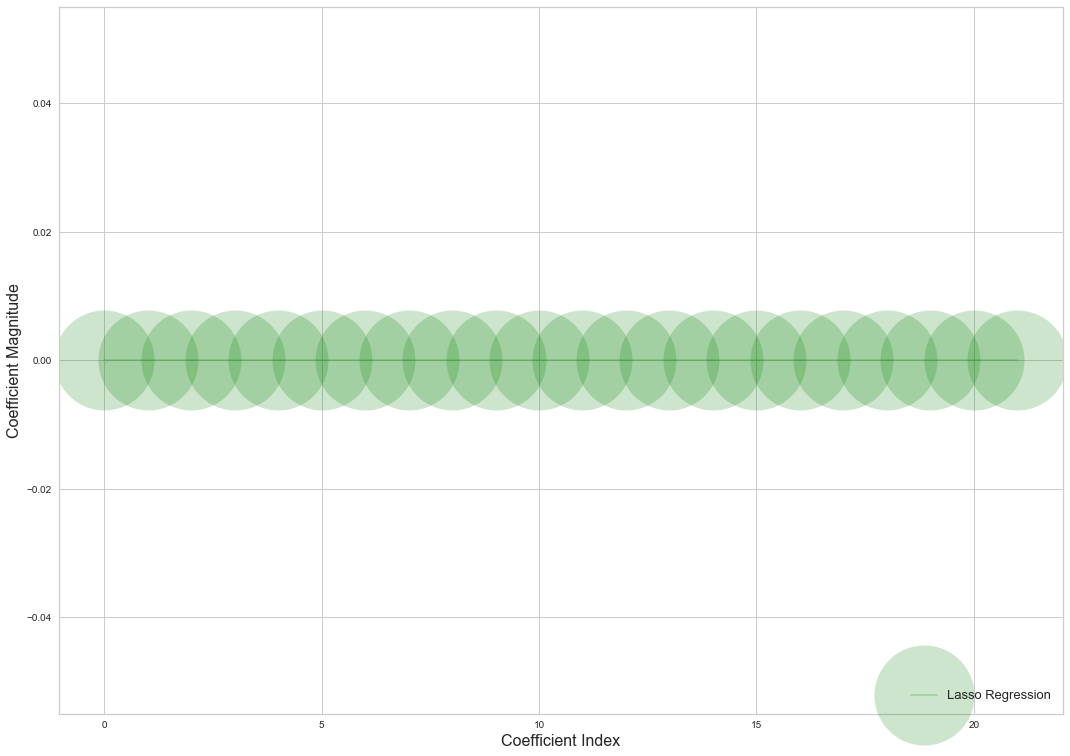

MSE for lasso Regression: 0.005296963705428534
Score for Lasso Regression: -0.003639265785665868
Lasso Coefficients: [-0. -0. -0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0. -0.  0. -0. -0.
 -0. -0.  0. -0.]
Lasso Sparse coefficients: 
Lasso Intercept: [0.50457195]


In [383]:
# Separate the train and test data 80/20
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.18, random_state=10)
#Implement LASSO REGRESSION
lassoReg = Lasso(alpha=0.4, normalize=False)
lassoReg.fit(X_train,y_train)
pred_cv = lassoReg.predict(X_test)
# RETRIEVE MSE
plt.plot(lassoReg.coef_,alpha=0.2,linestyle='-',marker='o',markersize=100,color='green',label='Lasso Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

mse = np.mean((pred_cv - y_test)**2)
print("MSE for lasso Regression:",mse)
print("Score for Lasso Regression:",lassoReg.score(X_test,y_test))
coeffs = lassoReg.coef_       
print("Lasso Coefficients:",coeffs)
coeffs = lassoReg.sparse_coef_  
print("Lasso Sparse coefficients:",coeffs)
coeffs = lassoReg.intercept_    
print("Lasso Intercept:",coeffs)





# The score of this  LASSO Regressor model is okay.




## Make a list of dataframe objects so that we can iterate over them to perform needed tasks 

In [348]:
data_list=[data1,data2,data3,data4,data4,data5]

## First we need to normalize the data for later use 

In [349]:

# feature_list = ['close','volume','RSI','SMA','EMA',\
#     'MACD','MACD_Hist','MACD_Signal','SlowD','SlowK','WMA','Real Upper Band','Real Lower Band',\
#         'Real Middle Band','KAMA','DEMA','ADX','Aroon Up','Aroon Down','daily_diff']
def get_normalized_data(data,feature_list,scaler=None):
    
    # Initialize a scaler, then apply it to the features
    if scaler=='MinMaxScaler()':
        scaler = MinMaxScaler()
        data[feature_list] = scaler.fit_transform(data[feature_list])
    if scaler=='StandardScaler()':
        scaler=StandardScaler()
        data[feature_list] = scaler.fit_transform(data[feature_list])

    return data
normalized_stocks_list=[]
for data in data_list:
    normalized_stocks=get_normalized_data(data,feature_list,scaler='MinMaxScaler()')
    normalized_stocks_list.append(normalized_stocks)



/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: Data

## Create new dataframe object which have all been normalized

In [350]:
data1_normalized=normalized_stocks_list[0]
data2_normalized=normalized_stocks_list[1]
data3_normalized=normalized_stocks_list[2]
data4_normalized=normalized_stocks_list[3]
data5_normalized=normalized_stocks_list[4]
data5_normalized["change"] = data5["daily_diff"]>= 0
data5_normalized["change"] = data5["change"].astype(int)
# print(data5_normalized.head(10))
print(data1_normalized.head(1))
# print(data2_normalized.head(1))
# print(data3_normalized.head(1))
# print(data4_normalized.head(1))
# print(data5_normalized.head(1))

   Day      open      high       low     close    volume       SMA       EMA  \
0    1  0.020563  0.017348  0.019644  0.018891  0.148011  0.010972  0.011037   

        WMA      DEMA  ...     ROC  Aroon Down  Aroon Up  Real Lower Band  \
0  0.011671  0.010676  ... -7.0098    0.533333       0.1         0.026435   

   Real Middle Band  Real Upper Band    SAR  high_diff  low_diff  daily_diff  
0          0.017263         0.014376  18.74   0.001382  0.071976    0.469777  

[1 rows x 28 columns]


## May be able to find another way to normalize the data or something to see how the following algorithms respond to the different transforms....

Score of the model is: 9.423058548609978


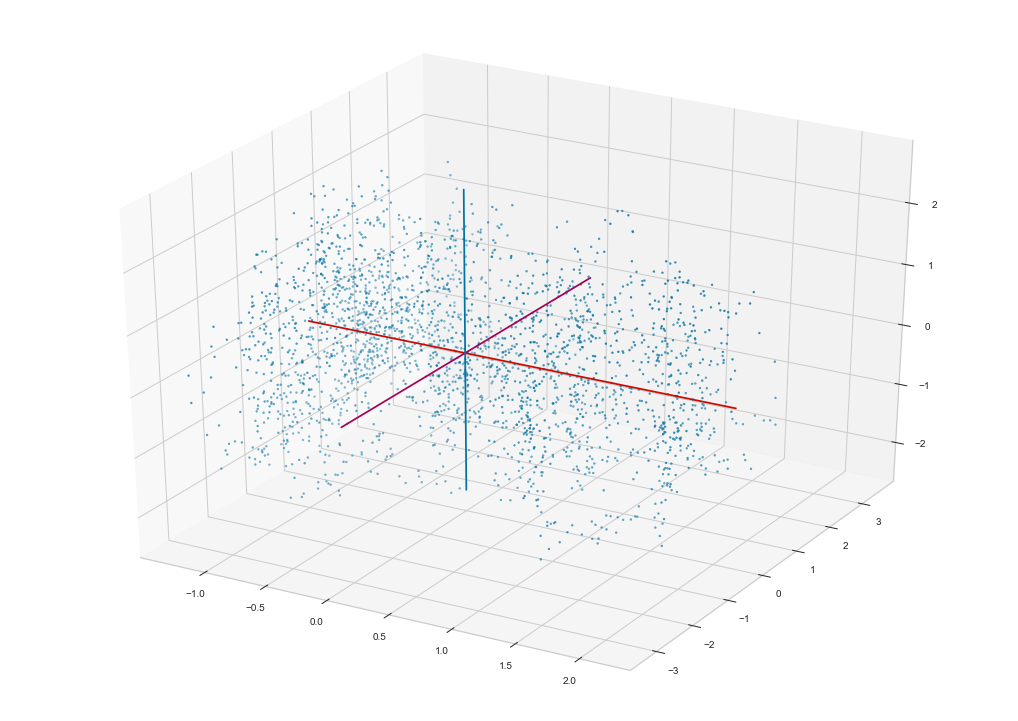

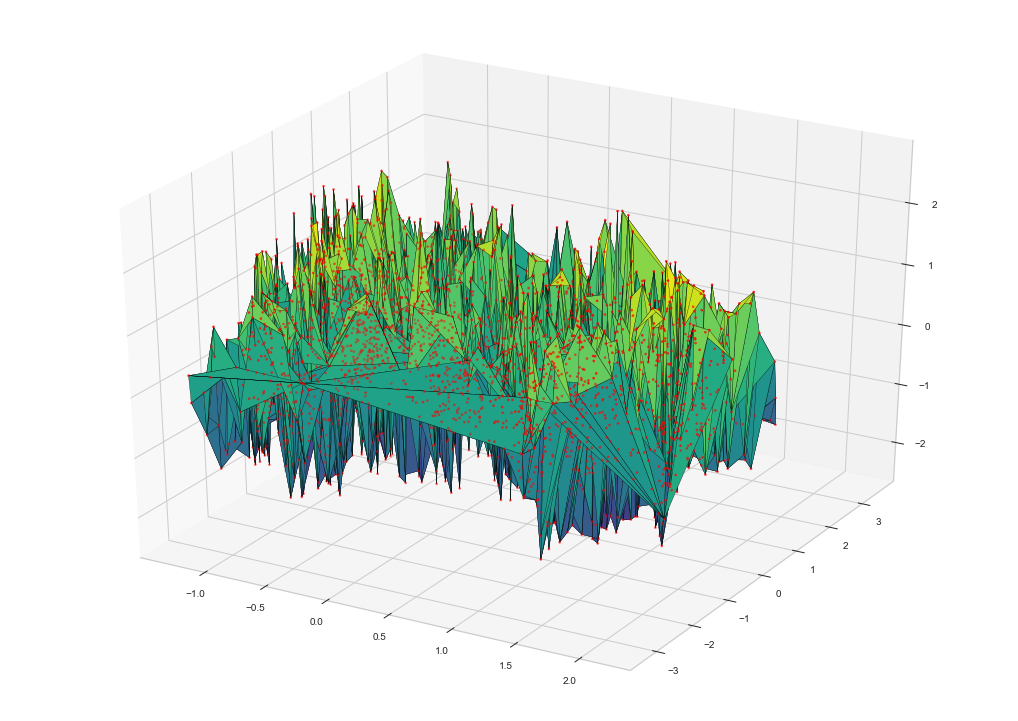

array([9.30298324e-01, 6.92460418e-02, 1.74762917e-04])

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

PCA: PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)
explained variance ratio: [9.30298324e-01 6.92460418e-02 1.74762917e-04]


In [351]:
import seaborn as sns
from mpl_toolkits import mplot3d
from sklearn.decomposition import IncrementalPCA
def plotPCA(data1_normalized):
    pca = PCA(n_components=3,whiten=True)
    principalComponents = pca.fit_transform(data1_normalized)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2','Principal Component 3'])
    finalDf = pd.concat([principalDf, data1_normalized[['daily_diff']]], axis = 1)
#     ipca = IncrementalPCA(n_components=3, batch_size=3)
#     principalComponents_incremental=ipca.fit(data1_normalized)
#     principalDf_incremental = pd.DataFrame(data = principalComponents_incremental, columns = ['Principal Component 1', 'Principal Component 2','Principal Component 3'])
    
    # Plot initialisation
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.scatter(principalDf['Principal Component 1'], principalDf['Principal Component 2'], principalDf['Principal Component 3'], cmap="Set2_r", s=4)
    score=pca.score(data1_normalized)
    print("Score of the model is:",score)
    # make simple, bare axis lines through space:
    xAxisLine = ((min(principalDf['Principal Component 1']), max(principalDf['Principal Component 1'])), (0, 0), (0,0))
    ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
    yAxisLine = ((0, 0), (min(principalDf['Principal Component 2']), max(principalDf['Principal Component 2'])), (0,0))
    ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'm')
    zAxisLine = ((0, 0), (0,0), (min(principalDf['Principal Component 3']), max(principalDf['Principal Component 3'])))
    ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'b')
    plt.show()
    ax = plt.axes(projection='3d')
    ax.plot_trisurf(principalDf['Principal Component 1'], principalDf['Principal Component 2'], principalDf['Principal Component 3'],cmap='viridis', edgecolor='black')
    ax.scatter(principalDf['Principal Component 1'], principalDf['Principal Component 2'], principalDf['Principal Component 3'], c='red', cmap='viridis', linewidth=0.3,s=5)
# Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, 
# BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, 
# OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, 
# PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, 
# RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, 
# Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, 
# twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r


    




    plt.show()
    display(pca.explained_variance_ratio_)
    display(pca)
    explained_varianceRatio=pca.explained_variance_ratio_
    print("PCA:",pca)
    print("explained variance ratio:",explained_varianceRatio)
plotPCA(data1_normalized.drop(['Day'],axis=1))
# print(data1_normalized.head(1))

## Explanation of the PCA results - type explanation of results here

## Could possibly get rid of the ehatmap but I beleive that should keep the correlation matrix in order to help with the explanation fo the PCA algorithm

## Correlation matrix and cluster heat map of the Features & breakdown

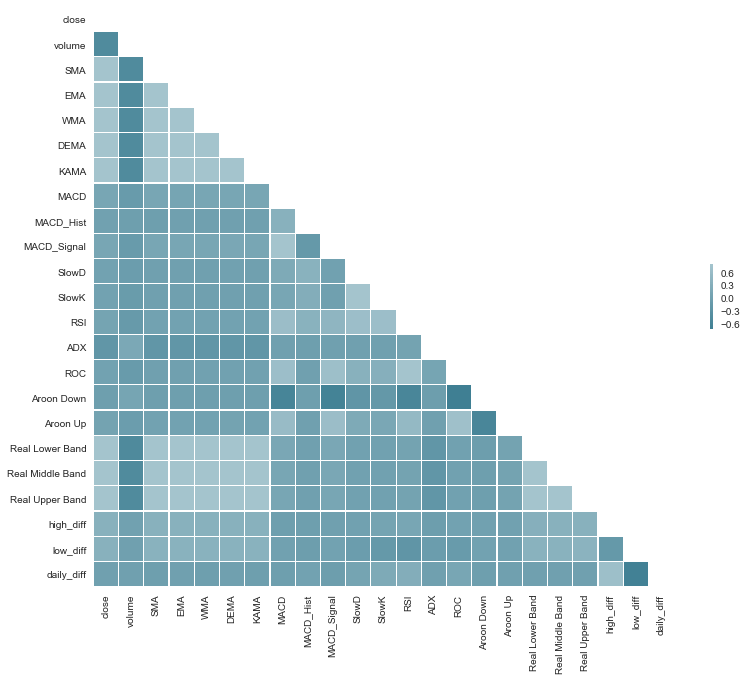

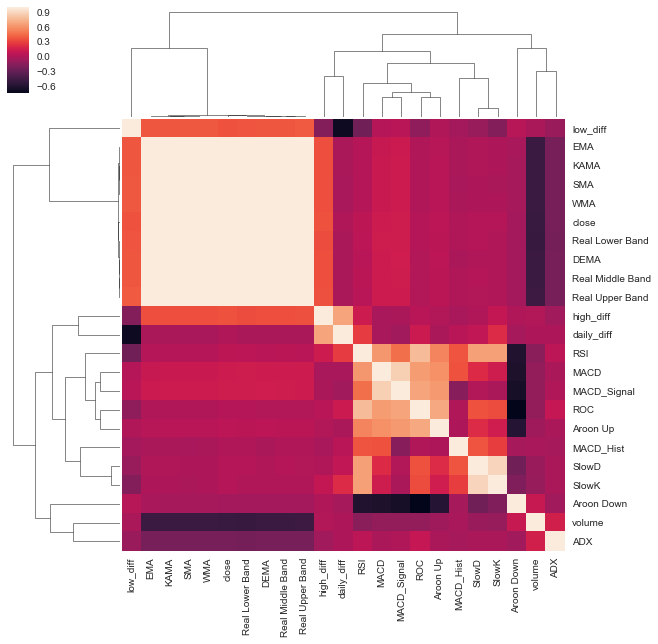

In [352]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
corr = data1_normalized.drop(['Day','SAR','open','high','low'],axis=1).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(13,12))
cmap = sns.diverging_palette(1300, 500, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=2,
            square=True, linewidths=.2, cbar_kws={"shrink": .1})
sns.clustermap(corr)

## Linear Regression

In [353]:
# data_2=pd.DataFrame()
# index=0
# data_2=pd.read_csv('NASDAQ_FEATURES.csv',header=0,encoding = 'unicode_escape',index_col=index)
# # print(data_2)

def scale_range(x, input_range, target_range):
    
    range = [np.amin(x), np.amax(x)]
    x_std = (x - input_range[0]) / (1.0*(input_range[1] - input_range[0]))
    x_scaled = x_std * (1.0*(target_range[1] - target_range[0])) + target_range[0]
    return x_scaled, range
def train_test_split_linear_regression(data2_normalized):
    
    # Create numpy arrays for features and targets
    feature = []
    label = []

    # Convert dataframe columns to numpy arrays for scikit learn
    # fix this later
    for index, row in data2_normalized.iterrows():
        # print([np.array(row['close'])])
        feature.append([row['Day']])
        label.append([(row['daily_diff'])])
        

    # Regularize the feature and target arrays and store min/max of input data for rescaling later
    feature_bounds = [min(feature), max(feature)]
    feature_bounds = [feature_bounds[0][0], feature_bounds[1][0]]
    label_bounds = [min(label), max(label)]
    label_bounds = [label_bounds[0][0], label_bounds[1][0]]

    feature_scaled, feature_range = scale_range(np.array(feature), input_range=feature_bounds, target_range=[-1.0, 1.0])
    label_scaled, label_range = scale_range(np.array(label), input_range=label_bounds, target_range=[-1.0, 1.0])

    # Define Test/Train Split 80/20
    split = .2
    split = int(math.floor(len(data2_normalized['Day']) * split))

    # Set up training and test sets
    X_train = feature_scaled[:-split]
    X_test = feature_scaled[-split:]

    y_train = label_scaled[:-split]
    y_test = label_scaled[-split:]

    return X_train, X_test, y_train, y_test, label_range
# data
X_train, X_test, y_train, y_test, label_range= train_test_split_linear_regression(data1_normalized.drop(['open','close','high','low'],axis=1))


## Build LinReg Model

In [354]:
def build_model(X, y):
    
    X = np.reshape(X, (X.shape[0], 1))
    y = np.reshape(y, (y.shape[0], 1))
    linear_mod = linear_model.LinearRegression()  # defining the linear regression model
    
    linear_mod.fit(X, y)  # fitting the data points in the model

    return linear_mod
def predict_prices(model, x, label_range):
    
    x = np.reshape(x, (x.shape[0], 1))
    predicted_price = model.predict(x)
    predictions_rescaled, re_range = scale_range(predicted_price, input_range=[-1.0, 1.0], target_range=label_range)

    return predictions_rescaled.flatten()
print("Open   --- mean :", np.mean(data2_normalized['open']),  "  \t Std: ", np.std(data2_normalized['open']),  "  \t Max: ", np.max(data2_normalized['open']),  "  \t Min: ", np.min(data2_normalized['open']))
print("Close  --- mean :", np.mean(data2_normalized['close']), "  \t Std: ", np.std(data2_normalized['close']), "  \t Max: ", np.max(data2_normalized['close']), "  \t Min: ", np.min(data2_normalized['close']))
print("Volume --- mean :", np.mean(data2_normalized['volume']),"  \t Std: ", np.std(data2_normalized['volume']),"  \t Max: ", np.max(data2_normalized['volume']),"  \t Min: ", np.min(data2_normalized['volume']))





Open   --- mean : 0.37273005190781383   	 Std:  0.29165691051358045   	 Max:  1.0   	 Min:  0.0
Close  --- mean : 0.37529300798953413   	 Std:  0.29199697017716814   	 Max:  1.0   	 Min:  0.0
Volume --- mean : 0.06932781950905381   	 Std:  0.06405387015851811   	 Max:  1.0   	 Min:  0.0


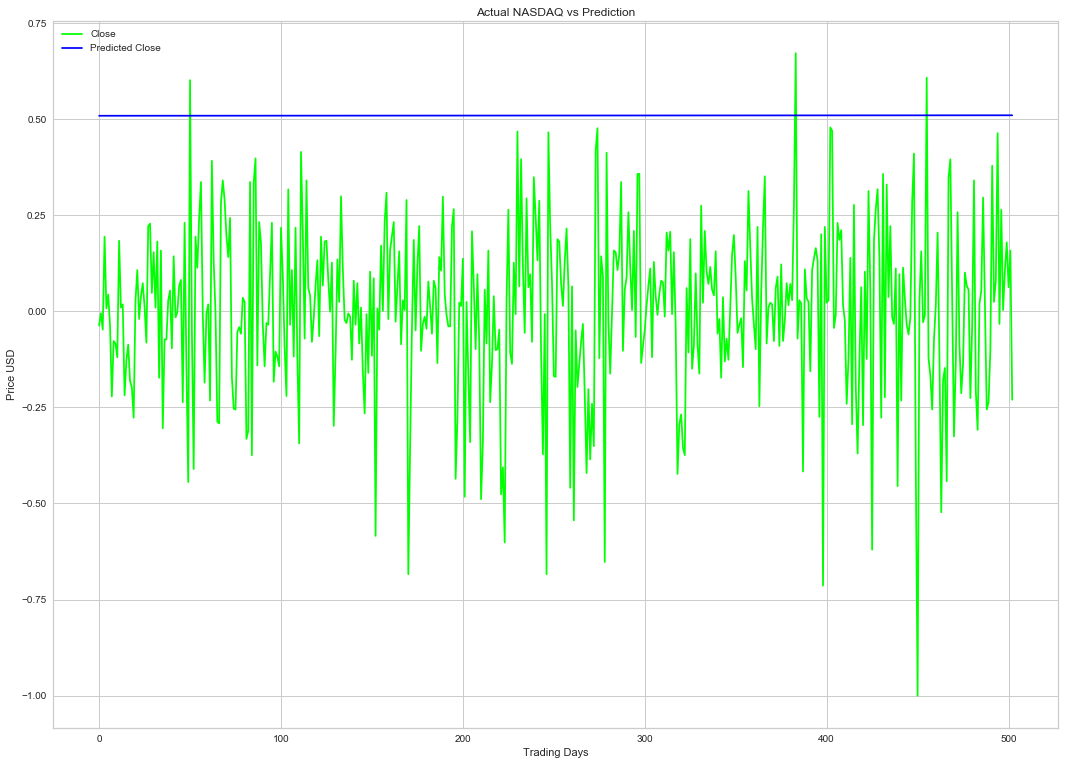

Model Coefficient: [[0.00633899]]
Mean squared error: 0.27
R2= -0.25


In [355]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
def plot_prediction(actual, prediction, title='Actual NASDAQ vs Prediction', y_label='Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='upper left')
    plt.show()
# Building the model for simple linear regression
model=build_model(X_train,y_train)
simple_predictions=predict_prices(model,X_test, label_range)
plot_prediction(y_test,simple_predictions)
print('Model Coefficient:',model.coef_)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("Mean squared error: %.2f"
      % mean_squared_error(X_train, y_train))
print('R2= %.2f' % r2_score(X_train, y_train))



## Need an explanation here of the linear regression model and the abstractions that we made from looking at the above graph as well as explained the MSE and R^2 value(s)

## Preprocessing for LSTM model(s)

In [356]:
import os
# normalized_stocks=data_2
# normalized_stocks=normalized_stocks.drop('Day',1)
# normalized_stocks=get_normalized_data(normalized_stocks,feature_list,scaler='MinMaxScaler()')
# display(normalized_stocks.shape)
# display(normalized_stocks.head())
data1_normalized=data1_normalized.drop(['SAR'],axis=1)
# data1_normalized=data1_normalized.drop(['SAR','ROC'],axis=1) <- this doesnt perform as well as just removing SAR

In [357]:
def train_test_split_lstm(stocks, prediction_time=1, test_data_size=75, unroll_length=50):
    
    # training data
    test_data_cut = test_data_size + unroll_length + 1

    x_train = stocks[0:-prediction_time - test_data_cut].as_matrix()
    y_train = stocks[prediction_time:-test_data_cut]['close'].as_matrix()

    # test data
    x_test = stocks[0 - test_data_cut:-prediction_time].as_matrix()
    y_test = stocks[prediction_time - test_data_cut:]['close'].as_matrix()

    return x_train, x_test, y_train, y_test

# sequence_length=12<-do not erase this 
def unroll(data, sequence_length=6):
    
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    return np.asarray(result)
# print(data1_normalized.head(1))
xTrain, xTest,yTrain, yTest = train_test_split_lstm(data1_normalized.drop(['Day','daily_diff'],axis=1), 5)

unroll_length = 50

xTrain = unroll(xTrain, unroll_length)
xTest = unroll(xTest, unroll_length)
yTrain = yTrain[-xTrain.shape[0]:]
yTest = yTest[-xTest.shape[0]:]


## Get the shapes of the data
print("x_train", xTrain.shape)
print("y_train", yTrain.shape)
print("x_test", xTest.shape)
print("y_test", yTest.shape)
os.environ['KMP_DUPLICATE_LIB_OK']='True'

x_train (2337, 50, 25)
y_train (2337,)
x_test (71, 50, 25)
y_test (71,)


/Users/trevor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/trevor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/Users/trevor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/Users/trevor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


## Testing multiple activation function + optimizer + layers with different activation functions 
## Note: We will keep the ones that produce the most favorable results

In [358]:
from keras.utils.vis_utils import plot_model,model_to_dot
# import pydot
from IPython.display import SVG
# from keras.utils.utils import model_to_dot
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

from datetime import datetime


import tensorflow as tf
from tensorflow import keras

def build_basic_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        128,
        return_sequences=False))

    model.add(Dense(
        units=1))
    model.add(Activation('relu'))
#     comment below out I am just seeing what it does
#     model.add(Dropout(0.4))
    
#     model.add(Dense(
#         units=1))
#     model.add(Activation('sigmoid'))
    
#     model.add(Dense(
#         units=1))
#     model.add(Activation('relu'))

    return model

model1=build_basic_model(input_dim = xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
# model.compile(loss='mean_squared_error', optimizer='adagrad')
# Note:adding 'adagrad' optimizer and dropout resulted in : -> 
# continued..:Forget about the dropout and: the optimizer is not good but for complex models from what it looks like

# Below is the original
# model.compile(loss='mean_squared_error', optimizer='nadam',metrics=['accuracy'])
model1.compile(loss='mean_squared_error', optimizer='nadam')
print('compilation time : ', time.time() - start)

model1.fit(xTrain,yTrain,epochs=1,validation_split=.03)

predictions = model1.predict(xTest)
expert_binary_list=[]


# plot_model(model, show_shapes=True, show_layer_names=True,to_file='model.png')
# SVG(model_to_dot(model).create(prog='dot', format='svg'))
j=0
predict_trend=[]
f1=[]

while j < len(yTest):
    predict_trend.append(yTest[j]-predictions[j])
    j+=1

    realitybinary = np.where(reality>0,1,0) #here Im finding where the actual temperature is above 70 or not. 

    expertsbinary=[]


    for p in predict_trend:
        expertsbinary.append(np.where(p>0,1,0))
    expertsbinary=np.array(expertsbinary)
    f1.append(expertsbinary)
    
# print(len(f))

expert_binary_list.append(f1)


compilation time :  0.05564117431640625
Train on 2266 samples, validate on 71 samples
Epoch 1/1
2266/2266 [==============================] - 75s 33ms/step - loss: 0.0125 - val_loss: 0.0016


71


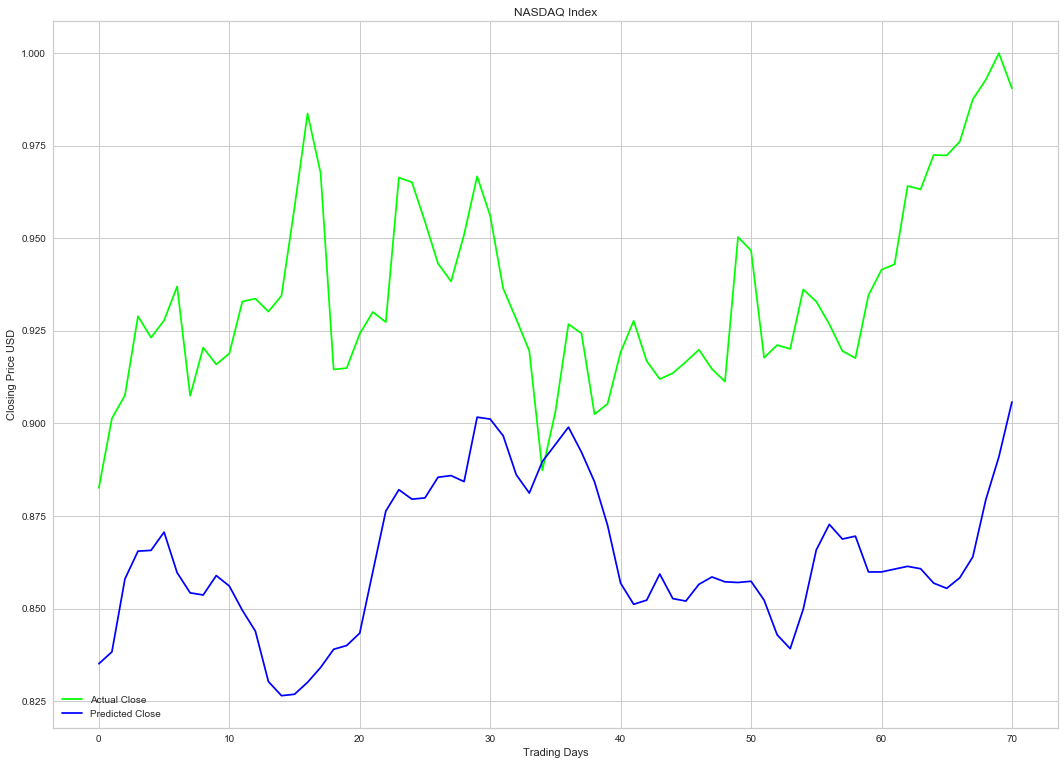

Train Score: 0.00103444 MSE (0.03216264 RMSE)
Test Score: 0.00595593 MSE (0.07717465 RMSE)


In [359]:
print(len(expert_binary_list[0]))
def plot_lstm_prediction(actual, prediction, title='NASDAQ Index', y_label='Closing Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Actual Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='lower left')


    plt.show()
plot_lstm_prediction(yTest,predictions)

trainScore = model1.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model1.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

# new_model=train_test_split_lstm(data1_normalized, prediction_time=5, test_data_size=200, unroll_length=50)

## Pretty decent results on the last model - Continuing to investigate the efficacy of the activation function(s) & optimizers

In [360]:
def build_basic_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        128,
        return_sequences=False))

#     model.add(Dense(
#         units=1))
#     model.add(Activation('relu'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('sigmoid'))
    
#     model.add(Dense(
#         units=1))
#     model.add(Activation('relu'))

    return model

model2=build_basic_model(input_dim = xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model2.compile(loss='mean_squared_error', optimizer='nadam')
print('compilation time : ', time.time() - start)

model2.fit(xTrain,yTrain,epochs=1,validation_split=.03)

predictions = model2.predict(xTest)
j=0
predict_trend=[]
f2=[]

while j < len(yTest):
    predict_trend.append(yTest[j]-predictions[j])
    j+=1

    realitybinary = np.where(reality>0,1,0) #here Im finding where the actual temperature is above 70 or not. 

    expertsbinary=[]


    for p in predict_trend:
        expertsbinary.append(np.where(p>0,1,0))
    expertsbinary=np.array(expertsbinary)
    f2.append(expertsbinary)
    
# print(len(f))

expert_binary_list.append(f2)


compilation time :  0.10415387153625488
Train on 2266 samples, validate on 71 samples
Epoch 1/1
2266/2266 [==============================] - 79s 35ms/step - loss: 0.0096 - val_loss: 0.0022


## Plot the Basics LSTM model before improvement 

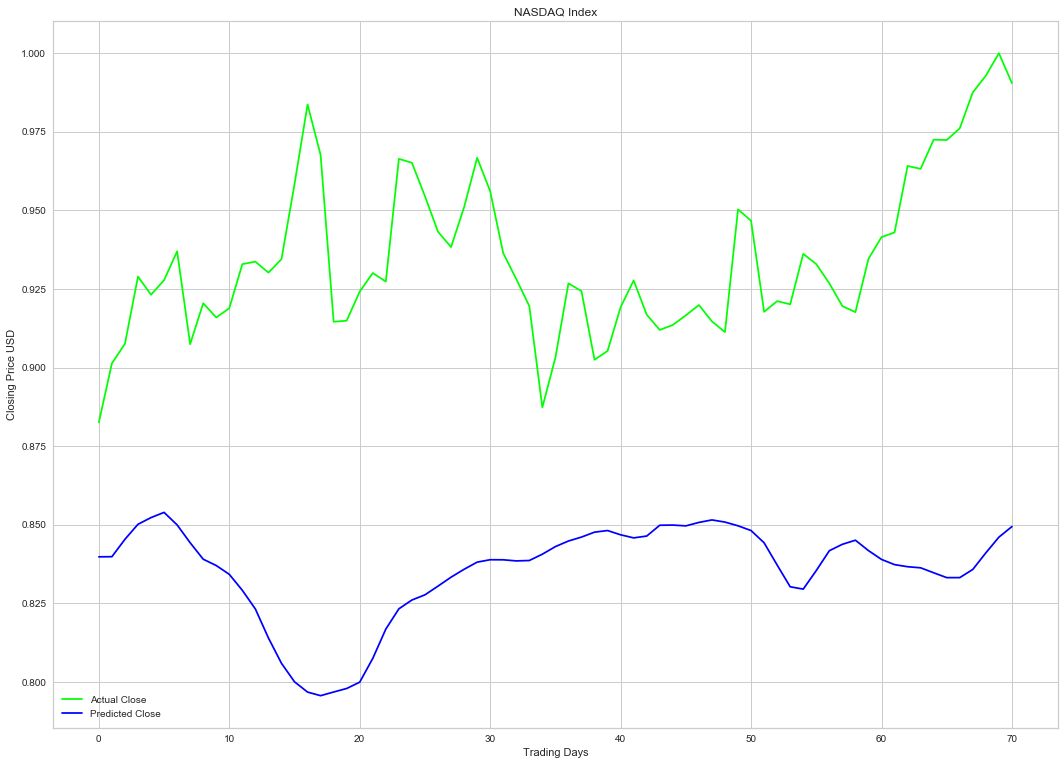

Train Score: 0.00252683 MSE (0.05026759 RMSE)
Test Score: 0.01091506 MSE (0.10447515 RMSE)


In [361]:

def plot_lstm_prediction(actual, prediction, title='NASDAQ Index', y_label='Closing Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Actual Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='lower left')


    plt.show()
plot_lstm_prediction(yTest,predictions)

trainScore = model2.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model2.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

# new_model=train_test_split_lstm(data1_normalized, prediction_time=5, test_data_size=200, unroll_length=50)

In [362]:
def build_basic_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        128,
        return_sequences=False))

#     model.add(Dense(
#         units=1))
#     model.add(Activation('relu'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('tanh'))
    
#     model.add(Dense(
#         units=1))
#     model.add(Activation('relu'))

    return model

model3=build_basic_model(input_dim = xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model3.compile(loss='mean_squared_error', optimizer='nadam')
print('compilation time : ', time.time() - start)

model3.fit(xTrain,yTrain,epochs=1,validation_split=.03)

predictions = model3.predict(xTest)
j=0
predict_trend=[]
f3=[]

while j < len(yTest):
    predict_trend.append(yTest[j]-predictions[j])
    j+=1

    realitybinary = np.where(reality>0,1,0) #here Im finding where the actual temperature is above 70 or not. 

    expertsbinary=[]


    for p in predict_trend:
        expertsbinary.append(np.where(p>0,1,0))
    expertsbinary=np.array(expertsbinary)
    f3.append(expertsbinary)
    
# print(len(f))

expert_binary_list.append(f3)

compilation time :  0.03637409210205078
Train on 2266 samples, validate on 71 samples
Epoch 1/1
2266/2266 [==============================] - 74s 33ms/step - loss: 0.0101 - val_loss: 0.0065


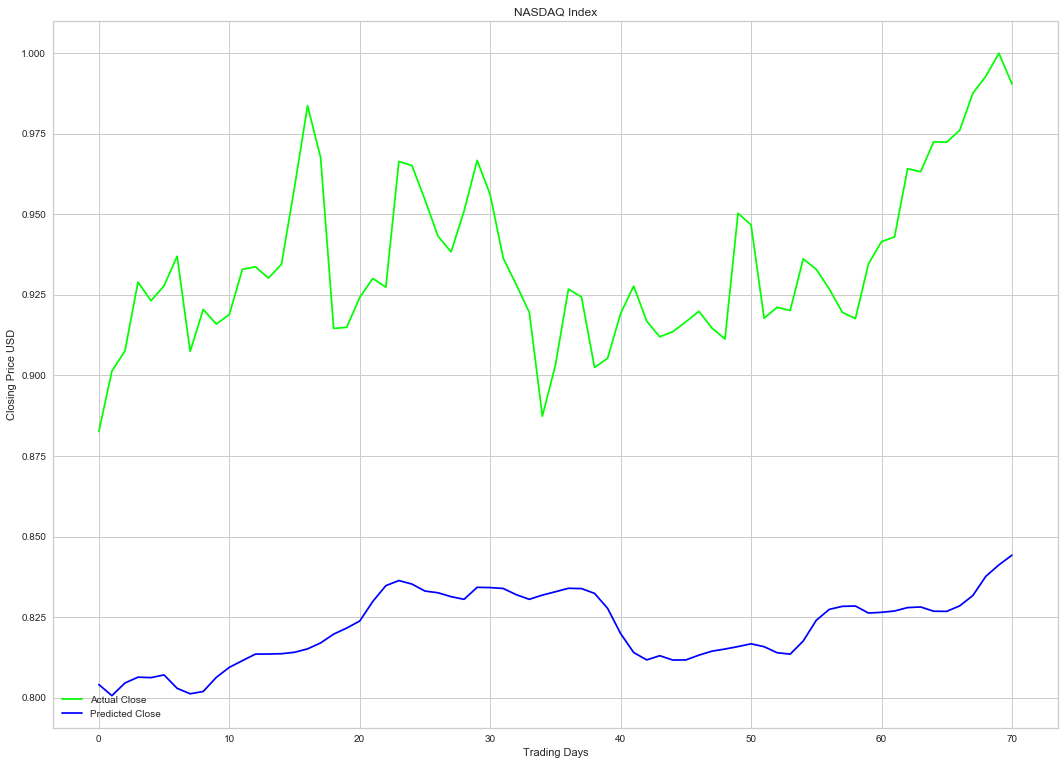

Train Score: 0.00118121 MSE (0.03436876 RMSE)
Test Score: 0.01333354 MSE (0.11547094 RMSE)


In [363]:
def plot_lstm_prediction(actual, prediction, title='NASDAQ Index', y_label='Closing Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Actual Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='lower left')


    plt.show()
plot_lstm_prediction(yTest,predictions)

trainScore = model3.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model3.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

# new_model=train_test_split_lstm(data1_normalized, prediction_time=5, test_data_size=200, unroll_length=50)

In [364]:
def build_basic_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        128,
        return_sequences=False))

#     model.add(Dense(
#         units=1))
#     model.add(Activation('relu'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('tanh'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('relu'))

    return model

model4=build_basic_model(input_dim = xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model4.compile(loss='mean_squared_error', optimizer='nadam')
print('compilation time : ', time.time() - start)

model4.fit(xTrain,yTrain,epochs=1,validation_split=.03)
j=0
predict_trend=[]
f4=[]

while j < len(yTest):
    predict_trend.append(yTest[j]-predictions[j])
    j+=1

    realitybinary = np.where(reality>0,1,0) #here Im finding where the actual temperature is above 70 or not. 

    expertsbinary=[]


    for p in predict_trend:
        expertsbinary.append(np.where(p>0,1,0))
    expertsbinary=np.array(expertsbinary)
    f4.append(expertsbinary)
    
# print(len(f))

expert_binary_list.append(f4)
# f=[]

compilation time :  0.04373979568481445
Train on 2266 samples, validate on 71 samples
Epoch 1/1
2266/2266 [==============================] - 82s 36ms/step - loss: 0.0157 - val_loss: 0.0237


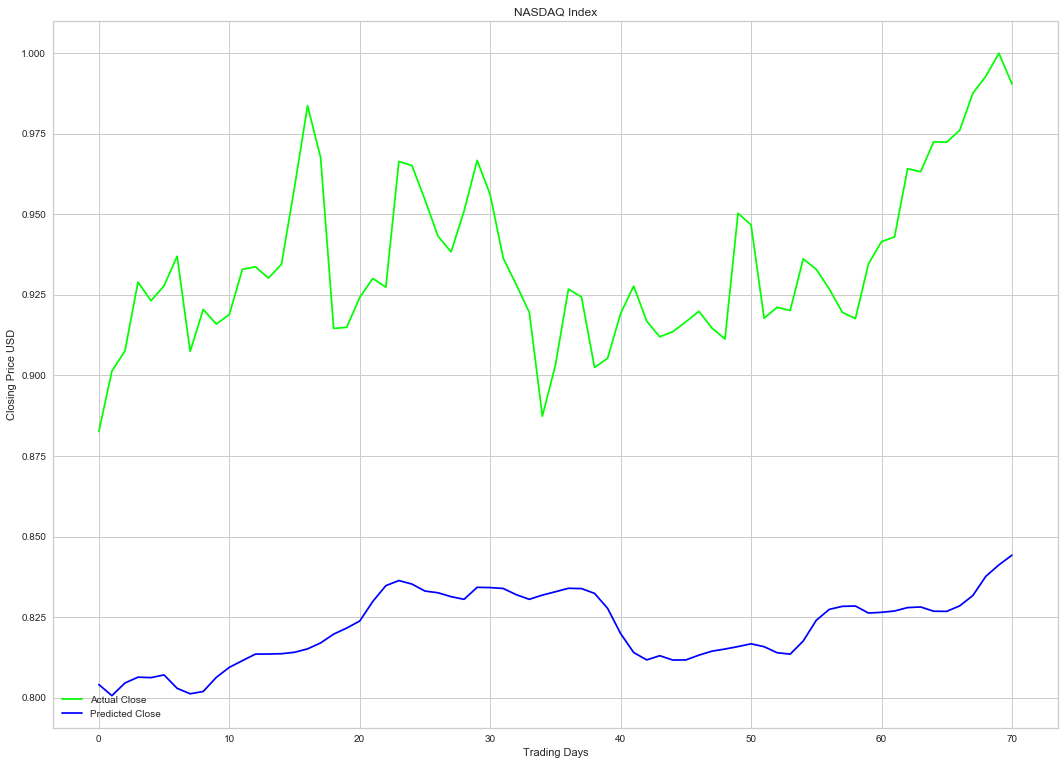

Train Score: 0.00500102 MSE (0.07071789 RMSE)
Test Score: 0.07839911 MSE (0.27999841 RMSE)


In [365]:
def plot_lstm_prediction(actual, prediction, title='NASDAQ Index', y_label='Closing Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Actual Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='lower left')


    plt.show()
plot_lstm_prediction(yTest,predictions)

trainScore = model4.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model4.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

# new_model=train_test_split_lstm(data1_normalized, prediction_time=5, test_data_size=200, unroll_length=50)

In [366]:
from keras.optimizers import SGD
def build_basic_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        128,
        return_sequences=False))

    model.add(Dense(
        units=10))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(
        units=2))
    
#     model.add(Activation('linear'))
#     model.add(Dense(
#         units=1))
    
    model.add(Activation('elu'))
    model.add(Dropout(0.2))
    model.add(Dense(
        units=3))
    
#     model.add(Activation('linear'))
#     model.add(Dense(
#         units=1))
    
    model.add(Activation('softplus'))
    
#     model.add(Dense(
#         units=1))
#     model.add(Activation('linear'))


#    Note: Model does well with 1.relu 2.elu 3.softmax 4.sigmoid
    model.add(Dense(
        units=1))
    model.add(Activation('sigmoid'))
    model.add(Dense(
        units=5))
#     model.add(Activation('sigmoid'))
#     model.add(Dense(
#         units=2))
    model.add(Activation('tanh'))
    model.add(Dense(
        units=2))
    model.add(Activation('linear'))
    model.add(Dense(
        units=1))
    
    return model

model5=build_basic_model(input_dim = xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)
# Below is an optimizer for stochastic gradient descent
# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(loss='categorical_crossentropy',
#               optimizer=sgd,
#               metrics=['accuracy'])
# Compile the model

# the best optimizer so far is 'adagrad'
start = time.time()
model5.compile(loss='mean_squared_error', optimizer='adadelta')
print('compilation time : ', time.time() - start)

model5.fit(xTrain,yTrain,epochs=5,validation_split=.01)
j=0
predict_trend=[]
f5=[]

while j < len(yTest):
    predict_trend.append(yTest[j]-predictions[j])
    j+=1

    realitybinary = np.where(reality>0,1,0) #here Im finding where the actual temperature is above 70 or not. 

    expertsbinary=[]


    for p in predict_trend:
        expertsbinary.append(np.where(p>0,1,0))
    expertsbinary=np.array(expertsbinary)
    f5.append(expertsbinary)
    
# print(len(f))

expert_binary_list.append(f5)

compilation time :  0.0340120792388916
Train on 2313 samples, validate on 24 samples
Epoch 1/5
2313/2313 [==============================] - 87s 38ms/step - loss: 0.0694 - val_loss: 0.1912
Epoch 2/5
2313/2313 [==============================] - 33s 14ms/step - loss: 0.0475 - val_loss: 0.0918
Epoch 3/5
2313/2313 [==============================] - 34s 15ms/step - loss: 0.0219 - val_loss: 0.0364
Epoch 4/5
2313/2313 [==============================] - 43s 19ms/step - loss: 0.0162 - val_loss: 0.0245
Epoch 5/5
2313/2313 [==============================] - 33s 14ms/step - loss: 0.0134 - val_loss: 0.0141


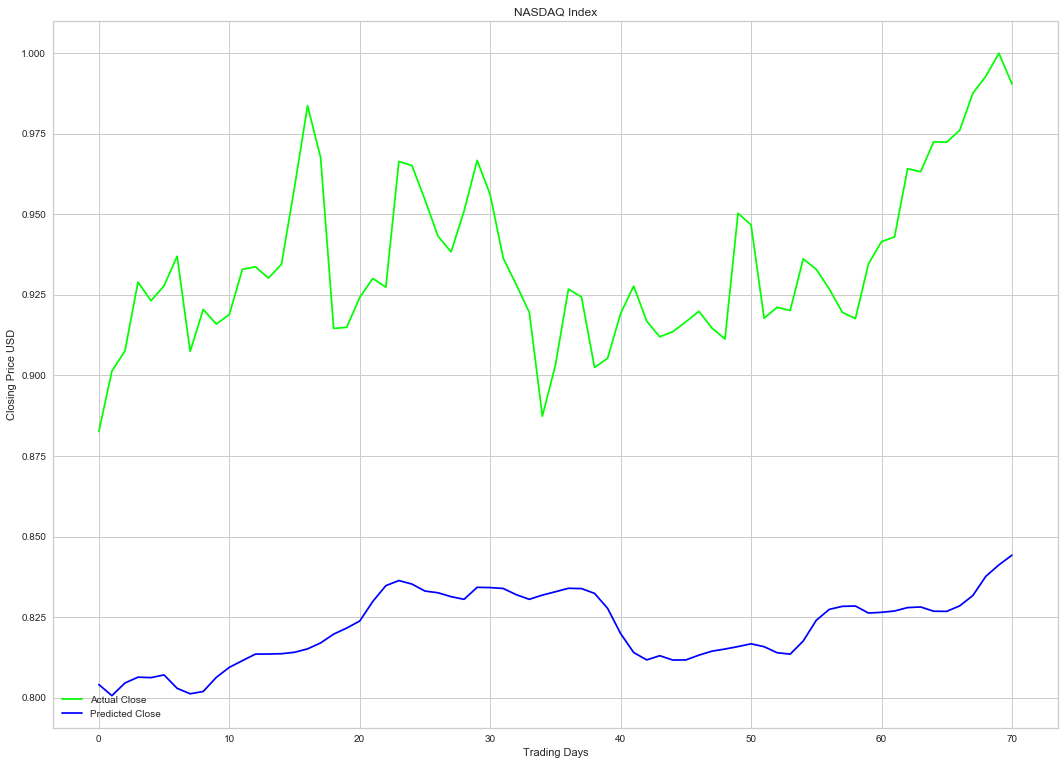

Train Score: 0.00362627 MSE (0.06021849 RMSE)
Test Score: 0.04755186 MSE (0.21806389 RMSE)


In [367]:
def plot_lstm_prediction(actual, prediction, title='NASDAQ Index', y_label='Closing Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Actual Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='lower left')


    plt.show()
plot_lstm_prediction(yTest,predictions)

trainScore = model5.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model5.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

# new_model=train_test_split_lstm(data1_normalized, prediction_time=5, test_data_size=200, unroll_length=50)

In [368]:
from keras.optimizers import SGD
def build_basic_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        128,
        return_sequences=False))

    model.add(Dense(
        units=10))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(
        units=2))
    
#     model.add(Activation('linear'))
#     model.add(Dense(
#         units=1))
    
    model.add(Activation('elu'))
    model.add(Dropout(0.2))
    model.add(Dense(
        units=3))
    
#     model.add(Activation('linear'))
#     model.add(Dense(
#         units=1))
    
    model.add(Activation('softplus'))
    
#     model.add(Dense(
#         units=1))
#     model.add(Activation('linear'))


#    Note: Model does well with 1.relu 2.elu 3.softmax 4.sigmoid
    model.add(Dense(
        units=1))
    model.add(Activation('sigmoid'))
    model.add(Dense(
        units=5))
#     model.add(Activation('sigmoid'))
#     model.add(Dense(
#         units=2))
    model.add(Activation('tanh'))
    model.add(Dense(
        units=2))
    model.add(Activation('linear'))
    model.add(Dense(
        units=1))
    
    return model

model6=build_basic_model(input_dim = xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)
# Below is an optimizer for stochastic gradient descent
# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(loss='categorical_crossentropy',
#               optimizer=sgd,
#               metrics=['accuracy'])
# Compile the model

# the best optimizer so far is 'adagrad'
start = time.time()
model6.compile(loss='mean_squared_error', optimizer='adagrad')
print('compilation time : ', time.time() - start)

model6.fit(xTrain,yTrain,epochs=1,validation_split=.03)
j=0
predict_trend=[]
f6=[]

while j < len(yTest):
    predict_trend.append(yTest[j]-predictions[j])
    j+=1

    realitybinary = np.where(reality>0,1,0) #here Im finding where the actual temperature is above 70 or not. 

    expertsbinary=[]


    for p in predict_trend:
        expertsbinary.append(np.where(p>0,1,0))
    expertsbinary=np.array(expertsbinary)
    f6.append(expertsbinary)
    
# print(len(f))

expert_binary_list.append(f6)

compilation time :  0.028995752334594727
Train on 2266 samples, validate on 71 samples
Epoch 1/1
2266/2266 [==============================] - 76s 34ms/step - loss: 0.0514 - val_loss: 0.0728


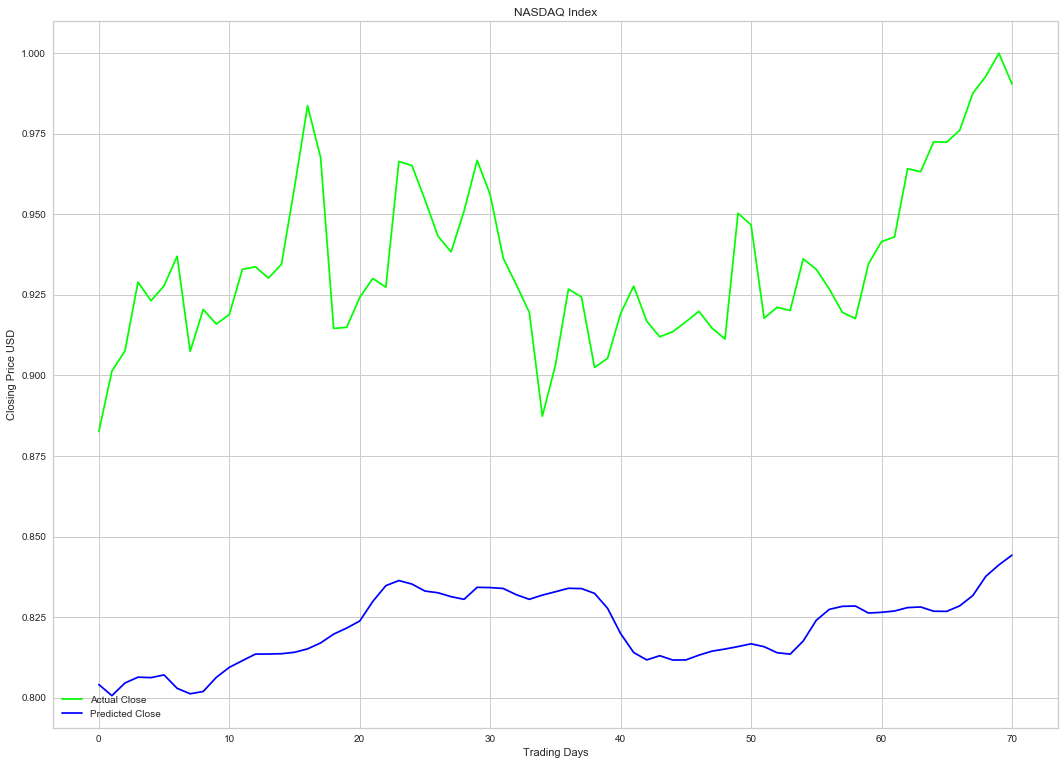

Train Score: 0.01955415 MSE (0.13983614 RMSE)
Test Score: 0.15691948 MSE (0.39613063 RMSE)


In [369]:
def plot_lstm_prediction(actual, prediction, title='NASDAQ Index', y_label='Closing Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Actual Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='lower left')


    plt.show()
plot_lstm_prediction(yTest,predictions)

trainScore = model6.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model6.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

# new_model=train_test_split_lstm(data1_normalized, prediction_time=5, test_data_size=200, unroll_length=50)

In [370]:
def build_basic_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        128,
        return_sequences=False))

    model.add(Dense(
        units=1))
    model.add(Activation('relu'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('linear'))
    
#     model.add(Dense(
#         units=1))
#     model.add(Activation('relu'))

    return model

model7=build_basic_model(input_dim = xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model7.compile(loss='mean_squared_error', optimizer='nadam')
print('compilation time : ', time.time() - start)

model7.fit(xTrain,yTrain,epochs=1,validation_split=.03)

predictions = model7.predict(xTest)
j=0
predict_trend=[]
f7=[]

while j < len(yTest):
    predict_trend.append(yTest[j]-predictions[j])
    j+=1

    realitybinary = np.where(reality>0,1,0) #here Im finding where the actual temperature is above 70 or not. 

    expertsbinary=[]


    for p in predict_trend:
        expertsbinary.append(np.where(p>0,1,0))
    expertsbinary=np.array(expertsbinary)
    f7.append(expertsbinary)
    
# print(len(f))

expert_binary_list.append(f7)

compilation time :  0.03616809844970703
Train on 2266 samples, validate on 71 samples
Epoch 1/1
2266/2266 [==============================] - 73s 32ms/step - loss: 0.0243 - val_loss: 0.0114


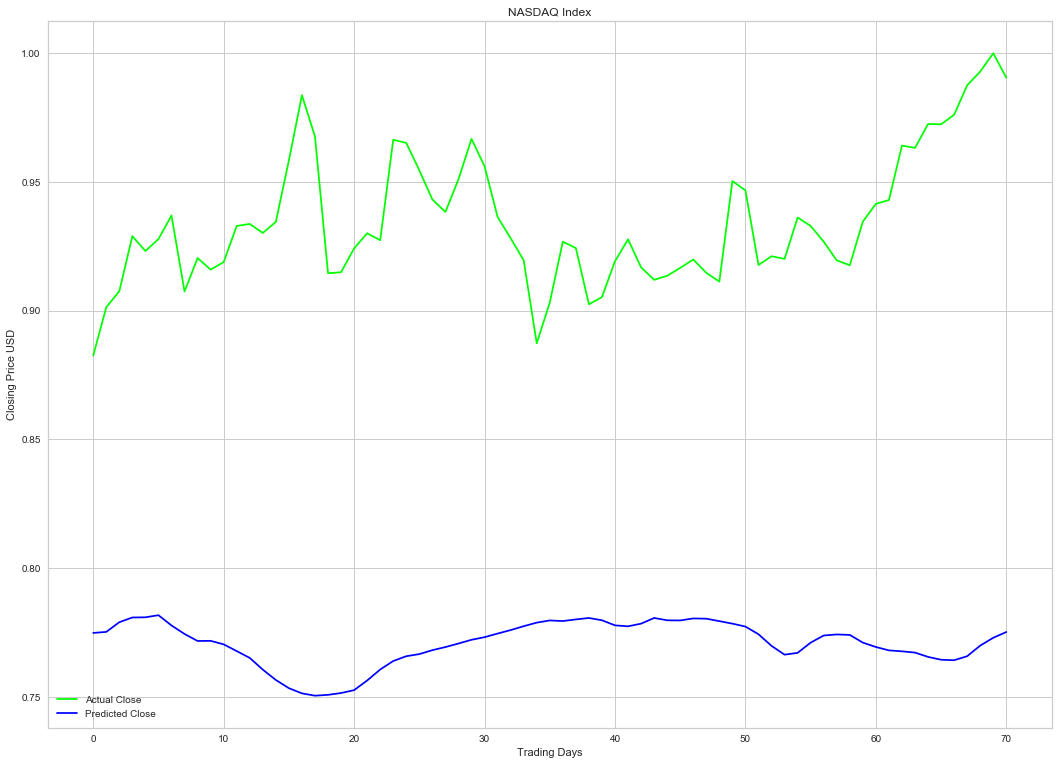

Train Score: 0.00243562 MSE (0.04935196 RMSE)
Test Score: 0.02777050 MSE (0.16664485 RMSE)


In [371]:

def plot_lstm_prediction(actual, prediction, title='NASDAQ Index', y_label='Closing Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Actual Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='lower left')


    plt.show()
plot_lstm_prediction(yTest,predictions)

trainScore = model7.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model7.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

In [372]:
def build_basic_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        128,
        return_sequences=False))

    model.add(Dense(
        units=1))
    model.add(Activation('linear'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('relu'))
    
#     model.add(Dense(
#         units=1))
#     model.add(Activation('relu'))

    return model

model8=build_basic_model(input_dim = xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model8.compile(loss='mean_squared_error', optimizer='nadam')
print('compilation time : ', time.time() - start)

model8.fit(xTrain,yTrain,epochs=5,validation_split=.01)

predictions = model8.predict(xTest)
j=0
predict_trend=[]
f8=[]

while j < len(yTest):
    predict_trend.append(yTest[j]-predictions[j])
    j+=1

    realitybinary = np.where(reality>0,1,0) #here Im finding where the actual temperature is above 70 or not. 

    expertsbinary=[]


    for p in predict_trend:
        expertsbinary.append(np.where(p>0,1,0))
    expertsbinary=np.array(expertsbinary)
    f8.append(expertsbinary)
    
# print(len(f))

expert_binary_list.append(f8)

compilation time :  0.03304886817932129
Train on 2313 samples, validate on 24 samples
Epoch 1/5
2313/2313 [==============================] - 79s 34ms/step - loss: 0.0158 - val_loss: 0.0017
Epoch 2/5
2313/2313 [==============================] - 32s 14ms/step - loss: 0.0021 - val_loss: 6.5554e-04
Epoch 3/5
2313/2313 [==============================] - 32s 14ms/step - loss: 0.0016 - val_loss: 0.0035
Epoch 4/5
2313/2313 [==============================] - 33s 14ms/step - loss: 0.0014 - val_loss: 0.0030
Epoch 5/5
2313/2313 [==============================] - 32s 14ms/step - loss: 8.2311e-04 - val_loss: 2.6935e-04


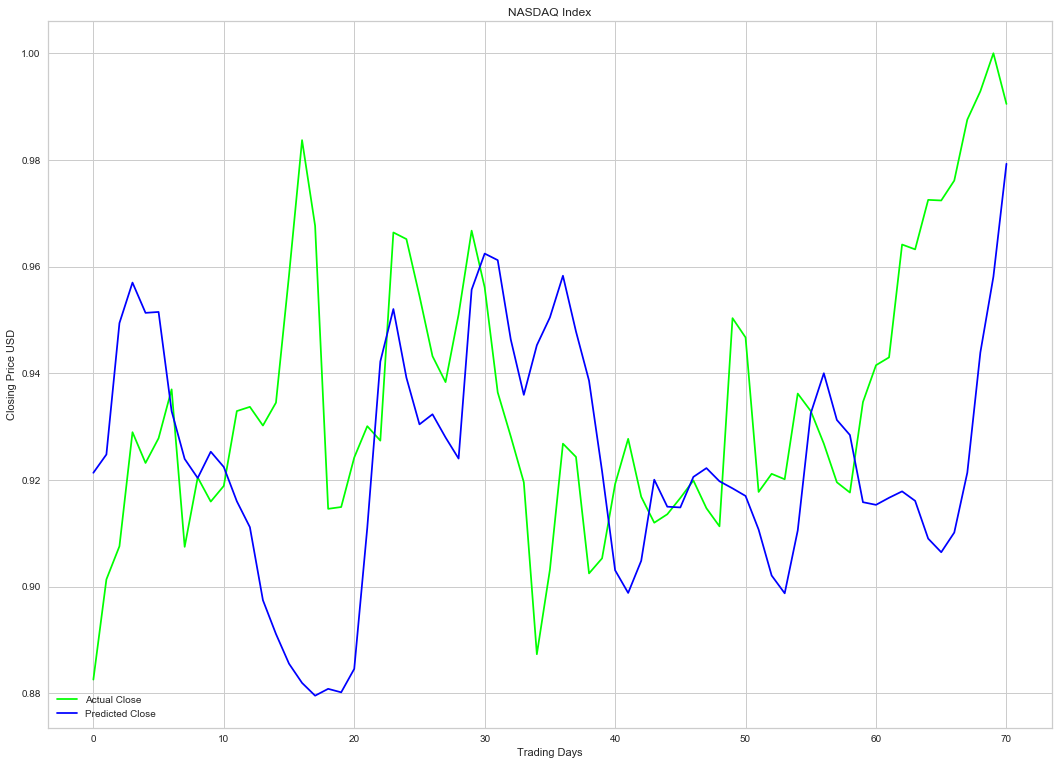

Train Score: 0.00059147 MSE (0.02432012 RMSE)
Test Score: 0.00117284 MSE (0.03424680 RMSE)


In [373]:

def plot_lstm_prediction(actual, prediction, title='NASDAQ Index', y_label='Closing Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Actual Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='lower left')


    plt.show()
plot_lstm_prediction(yTest,predictions)

trainScore = model8.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model8.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

In [374]:
def build_basic_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        128,
        return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(
        units=1))
    model.add(Activation('linear'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('relu'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('linear'))
    
#     model.add(Dense(
#         units=1))
#     model.add(Activation('relu'))

    return model

model9=build_basic_model(input_dim = xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model9.compile(loss='mean_squared_error', optimizer='nadam')
print('compilation time : ', time.time() - start)

model9.fit(xTrain,yTrain,epochs=5,validation_split=.01)

predictions = model9.predict(xTest)
j=0
predict_trend=[]
f9=[]

while j < len(yTest):
    predict_trend.append(yTest[j]-predictions[j])
    j+=1

    realitybinary = np.where(reality>0,1,0) #here Im finding where the actual temperature is above 70 or not. 

    expertsbinary=[]


    for p in predict_trend:
        expertsbinary.append(np.where(p>0,1,0))
    expertsbinary=np.array(expertsbinary)
    f.append(expertsbinary)
    
# print(len(f))

expert_binary_list.append(f9)

compilation time :  0.039557695388793945
Train on 2313 samples, validate on 24 samples
Epoch 1/5
2313/2313 [==============================] - 77s 33ms/step - loss: 0.1536 - val_loss: 0.4971
Epoch 2/5
2313/2313 [==============================] - 35s 15ms/step - loss: 0.1004 - val_loss: 0.3700
Epoch 3/5
2313/2313 [==============================] - 32s 14ms/step - loss: 0.0793 - val_loss: 0.2982
Epoch 4/5
2313/2313 [==============================] - 32s 14ms/step - loss: 0.0726 - val_loss: 0.2609
Epoch 5/5
2313/2313 [==============================] - 31s 14ms/step - loss: 0.0709 - val_loss: 0.2442


AttributeError: 'Figure' object has no attribute 'append'

In [ ]:

def plot_lstm_prediction(actual, prediction, title='NASDAQ Index', y_label='Closing Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Actual Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='lower left')


    plt.show()
plot_lstm_prediction(yTest,predictions)

trainScore = model9.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model9.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

In [ ]:
def build_basic_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        128,
        return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(
        units=1))
    model.add(Activation('linear'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('relu'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('linear'))
    
#     model.add(Dense(
#         units=1))
#     model.add(Activation('relu'))

    return model

model10=build_basic_model(input_dim = xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model10.compile(loss='mean_squared_error', optimizer='adagrad')
print('compilation time : ', time.time() - start)

model10.fit(xTrain,yTrain,epochs=3,validation_split=.01)

predictions = model10.predict(xTest)
j=0
predict_trend=[]
f10=[]

while j < len(yTest):
    predict_trend.append(yTest[j]-predictions[j])
    j+=1

    realitybinary = np.where(reality>0,1,0) #here Im finding where the actual temperature is above 70 or not. 

    expertsbinary=[]


    for p in predict_trend:
        expertsbinary.append(np.where(p>0,1,0))
    expertsbinary=np.array(expertsbinary)
    f10.append(expertsbinary)
    
# print(len(f))

expert_binary_list.append(f10)

In [ ]:
def plot_lstm_prediction(actual, prediction, title='NASDAQ Index', y_label='Closing Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Actual Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='lower left')


    plt.show()
plot_lstm_prediction(yTest,predictions)

trainScore = model10.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model10.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

In [ ]:
def build_basic_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        128,
        return_sequences=False))
    model.add(Dropout(0.4))
    model.add(Dense(
        units=1))
    model.add(Activation('linear'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('relu'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('linear'))
    
#     model.add(Dense(
#         units=1))
#     model.add(Activation('relu'))

    return model

model11=build_basic_model(input_dim = xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model11.compile(loss='mean_squared_error', optimizer='nadam')
print('compilation time : ', time.time() - start)

model11.fit(xTrain,yTrain,epochs=5,validation_split=.03)

predictions = model11.predict(xTest)
j=0
predict_trend=[]
f11=[]

while j < len(yTest):
    predict_trend.append(yTest[j]-predictions[j])
    j+=1

    realitybinary = np.where(reality>0,1,0) #here Im finding where the actual temperature is above 70 or not. 

    expertsbinary=[]


    for p in predict_trend:
        expertsbinary.append(np.where(p>0,1,0))
    expertsbinary=np.array(expertsbinary)
    f11.append(expertsbinary)
    
# print(len(f))

expert_binary_list.append(f11)

In [ ]:
def plot_lstm_prediction(actual, prediction, title='NASDAQ Index', y_label='Closing Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Actual Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='lower left')


    plt.show()
plot_lstm_prediction(yTest,predictions)

trainScore = model11.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model11.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

In [ ]:
def build_basic_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        128,
        return_sequences=False))
    model.add(Dropout(0.3))
    model.add(Dense(
        units=1))
    model.add(Activation('linear'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('linear'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('relu'))
    
#     model.add(Dense(
#         units=1))
#     model.add(Activation('relu'))

    return model

model12=build_basic_model(input_dim = xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model12.compile(loss='mean_squared_error', optimizer='nadam')
print('compilation time : ', time.time() - start)

model12.fit(xTrain,yTrain,epochs=5,validation_split=.03)
j=0
predict_trend=[]
f12=[]

while j < len(yTest):
    predict_trend.append(yTest[j]-predictions[j])
    j+=1

    realitybinary = np.where(reality>0,1,0) #here Im finding where the actual temperature is above 70 or not. 

    expertsbinary=[]


    for p in predict_trend:
        expertsbinary.append(np.where(p>0,1,0))
    expertsbinary=np.array(expertsbinary)
    f12.append(expertsbinary)
    
# print(len(f))

expert_binary_list.append(f12)

In [ ]:
def plot_lstm_prediction(actual, prediction, title='NASDAQ Index', y_label='Closing Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Actual Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='lower left')


    plt.show()
plot_lstm_prediction(yTest,predictions)

trainScore = model12.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model12.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

In [ ]:
def build_basic_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        128,
        return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(
        units=1))
    model.add(Activation('elu'))
    
#     model.add(Dense(
#         units=1))
#     model.add(Activation('relu'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('linear'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('relu'))
    
#     model.add(Dense(
#         units=1))
#     model.add(Activation('linear'))

    return model

model13=build_basic_model(input_dim = xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model13.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

model13.fit(xTrain,yTrain,epochs=5,validation_split=.03)
j=0
predict_trend=[]
f13=[]

while j < len(yTest):
    predict_trend.append(yTest[j]-predictions[j])
    j+=1

    realitybinary = np.where(reality>0,1,0) #here Im finding where the actual temperature is above 70 or not. 

    expertsbinary=[]


    for p in predict_trend:
        expertsbinary.append(np.where(p>0,1,0))
    expertsbinary=np.array(expertsbinary)
    f13.append(expertsbinary)
    
# print(len(f))

expert_binary_list.append(f13)

In [ ]:
def plot_lstm_prediction(actual, prediction, title='NASDAQ Index', y_label='Closing Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Actual Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='lower left')


    plt.show()
plot_lstm_prediction(yTest,predictions)

trainScore = model13.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model13.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

## IMPROVEMENT WANTED

## Build the Improved LSTM model

In [ ]:
# print(model13(yTest))
new_model=train_test_split_lstm(data1_normalized.drop(['Day','high','low'],axis=1), prediction_time=5, test_data_size=200, unroll_length=50)
new_model
def build_improved_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(Dropout(0.4))
# .4 is best so far

    model.add(LSTM(
        128,
        return_sequences=False))

    

    model.add(Dense(
        units=1))
    model.add(Activation('relu'))
    
    model.add(Dense(
        units=1))
    model.add(Activation('linear'))

    return model


# Set up hyperparameters
batch_size = 25

epochs = 5

# build improved lstm model
model14 = build_improved_model( xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)
start = time.time()

model14.compile(loss='mean_squared_error', optimizer='nadam')
print('compilation time : ', time.time() - start)
model14.fit(xTrain, yTrain, batch_size=batch_size,epochs=epochs,verbose=1,validation_split=0.05)
predictions = model14.predict(xTest, batch_size=batch_size)
plot_lstm_prediction(yTest,predictions)
trainScore = model14.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model14.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))
j=0
predict_trend=[]
f14=[]

while j < len(yTest):
    predict_trend.append(yTest[j]-predictions[j])
    j+=1

    realitybinary = np.where(reality>0,1,0) #here Im finding where the actual temperature is above 70 or not. 

    expertsbinary=[]


    for p in predict_trend:
        expertsbinary.append(np.where(p>0,1,0))
    expertsbinary=np.array(expertsbinary)
    f14.append(expertsbinary)
    
# print(len(f))

expert_binary_list.append(f14)



In [375]:
print(len(expert_binary_list))


8


## Weighted Majority ALGO - continue working on in the future

In [ ]:

# N = len(yTest) # of experts
# eps = 0.1 #epsilon
# T = len(predictions) #total number of time peridos
# w = np.ones(N)
# # print(w.shape)
# M = np.zeros(N)
# M_wma = 0
# # iterations


# days = [data5.Day.unique()]
# # reality = [data5.change.unique()]
# # print(yTest[0])
# data5_normalized['change'] = data5['daily_diff'] >= 0
# data5_normalized['change'] = data5['change'] * 1
# reality=data5_normalized['change'][:71]
# expert_list=[model1,model2,model3,model4,model5,model6,model7,model8,model9,model10,model11,model12,model13,model14]
# expert_list=[model]
# j=0
# predict_trend=[]
# f=[]

# while j < len(reality):
#     predict_trend.append(yTest[j]-predictions[j])
#     j+=1

#     realitybinary = np.where(reality>0,1,0) #here Im finding where the actual temperature is above 70 or not. 

#     expertsbinary=[]

# #If it is above 70 then I have a 1 and a 0 for less than or equal to 70
#     for p in predict_trend:
#         expertsbinary.append(np.where(p>0,1,0))
#     expertsbinary=np.array(expertsbinary)
#     f.append(expertsbinary)
# # print(len(expertsbinary))
# # print(len(realitybinary))


In [ ]:


# f = expertsbinary
# for t in range(T):
# #     print('day: ', t+1)
# #     print('expert weights: ', w)
# #     print('mistakes: ', M)
# #     t+1
# #     experts make predictions, suppose these are random predictions
    
# #     print("FFFFFFFF:",f)
    
# #     # tally weighted sum of {0,1} predictions  
#     one = np.dot(w,f)
#     zero = w.sum() - one
#     #x = 1 if one >= zero else 0 # make majority based decision 
    
#     #here is the random decision
#     prob = [one/(one+zero), zero/(one+zero)]
#     prob=np.reshape(prob, len(prob))
    
#     guess = np.random.choice([0,1],1,p = prob)
    
#     x = guess
    
    
# #     # reveal outcome, suppose it is random
#     y = realitybinary[t]
#     M_wma += (x != y) #count number of mistakes
    
# #     # weight update
#     for i in range(N):
#          w[i] = w[i]*(1 - eps)**(f[i]!=y) # penalize weight if made wrong prediction
#     M = M + (f != y)
    

# print('best expert made ', M.min(), ' mistakes')
# print('RWMA made ', M_wma, ' mistakes')

In [ ]:
# #Dont run this its for finding my average # of mistakes for 1000 trials

# f = expertsbinary
# total_mistakes = []
# for i in range(1000):
#     # initialize weight
#     w = np.ones(N)
#     M = np.zeros(N)
#     M_wma = 0

#     # iterations
#     for t in range (T):
#         # experts make predictions, suppose these are random predictions
# #         f = expertsbinary[t]

#         # tally weighted sum of {0,1} predictions  
#         one = np.dot(w,f)
#         zero = w.sum() - one
#         #x = 1 if one >= zero else 0 # make majority based decision 

#         #here is the random decision
#         prob = [one/(one+zero), zero/(one+zero)]
#         prob=np.reshape(prob, len(prob))
#         guess = np.random.choice([1,0],1,p = prob)
#         x = guess


#         # reveal outcome, suppose it is random
#         y = realitybinary[t]
#         M_wma += (x != y) #count number of mistakes

#         # weight update
#         for i in range(N):
#             w[i] = w[i]*(1 - eps)**(f[i]!=y) # penalize weight if made wrong prediction
#         M = M + (f != y)
#     total_mistakes.append(M_wma)

In [ ]:
# #this just prints my results from the above experiment
# print("total iter:" + str(len(total_mistakes)))
# print("Average total mistakes was " + str(np.average(total_mistakes)))
# print(total_mistakes)